# Data Source

Fifa_dataset.csv

### Using clustering algorithms to categorize similar players using their traits and their different skills in the field.

The datasets provided include the players data for the Career Mode from FIFA 15 to FIFA 20 ("players_20.csv"). The data allows multiple comparison of the same players across the last 6 version of the videogame.

Some ideas of possible analysis:

Historical comparison between Messi and Ronaldo (what skill attributes changed the most during time - compared to real-life stats);

Ideal budget to create a competitive team (at the level of top n teams in Europe) and at which point the budget does not allow to buy significantly better players for the 11-men lineup. An extra is the same comparison with the Potential attribute for the lineup instead of the Overall attribute;

Sample analysis of top n% players (e.g. top 5% of the player) to see if some important attributes as Agility or BallControl or Strength have been popular or not acroos the FIFA versions. An example would be seeing that the top 5% players of FIFA 20 are more fast (higher Acceleration and Agility) compared to FIFA 15. The trend of attributes is also an important indication of how some attributes are necessary for players to win games (a version with more top 5% players with high BallControl stats would indicate that the game is more focused on the technique rather than the physicial aspect).


### Data set

FIFA 20 features more than 30 official leagues, over 700 clubs and over 17,000 players. Included for the first time is the Romanian Liga I and its 14 teams, as well as Emirati club Al Ain, who were added following extensive requests from the fans in the region.
With the amount of player and team data available on the game, this makes for an interesting dataset with a rich in-depth breakdown of every possible recorded attribute a player can have. In addition, football lends a detailed structure to the player data due to the dynamic nature of the game and various positions a player may command. This results in a very complex and interesting structure in the dataset which we will look to explore in this project through unsupervised learning techniques

In [1]:
# Importing necessary libraries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
data = pd.read_csv('Fifa_dataset.csv')

In [3]:
data.shape

(18278, 104)

## Feature Description


1. sofifa_id - Id of the player
2. Player_url - Player URL
3. short_name - Player short name
4. long_name - Player complete name
5. age - Age of a plyer
6. dob - Date of Birth of a player
7. height_cm - Height of a player
8. weight_kg - Weight of a player
9. nationality - 162 Nationality of a player
10. club - 698 clubs and its an entity which is formed and governed by a comitte
11. overall - Its a overall rating out of 100 of each player performance data which depend on criteria of Pace, Shooting, Passing, Dribbling,
Defending and Physical
12. potential - How much a player can grow during his carrer mode. Every player starts with a rating and as time goes on, players will develop their
ability and skill, which increasestheir ratings and stats. 80-85: An exciting potential, 86-90: An exciting prospect, 91+: Has the potential to be
special
13. value_eur - A higher value means the player will be able to keep better possession of the ball whilst dribbling because he will keep the ball
closer, making it harder for the opponent to win it off of him.
14. wage_eur - Is a money/salary given to players. It's use is predominantly as an indicator to you on just how valuable your player has become.
15. player_postions - Is initial reference point for positioning himself related to his teammates. GK - Goal Keeper, ST - Striker, CB - Centre back,
CM - Centre mid field, CDM - Centre defensive mid field, LB - Left back, RB - Right Back, CAM - Centre attacking mid field, LM - Left mid field,
RM - Right mid field, LWB - Left wing back, RWB - Right wing back, LW - Left winger, RW - Right winger, RF - Right forward, LF - Left forward,
CF - Centre forward
16. preferred_foot - If a fifa player preferred foot is right, his weak foot will be left and vice-versa
17. international_reputation - International reputation is rated with 1-5 stars. Players with 1 or 2 stars do not get an OVR boost. From a 51 rating
onwards, a player gets +1 OVR if he has 3 stars in that category. For four-star players, this becomes +1 OVR between 36 and 66 GES and +2
OVR for 67-99 GES. Five-star players get an increase of +1 OVR for 24-49, +2 OVR for 50-74, and +3 OVR for 75-99. Van Dijk had four stars in
FIFA 20 (+2 OVR). So, in our example from just now, Van Dijk has the 88 OVR + 2 OVR, which gives a final rating of 90 OVR.
18. weak_foot - A player's foot (left or right) that is weaker than their preferred foot. A player's attribute rated between 1 to 5 which specifies the
shot power and ball control for the other foot of that player than his preferred foot's. The higher rate defines the higher shot power and ball
control.
19. skill_moves - These are the best/effective moves in the game which often yield the best results on the pitch.
20. work_rate - work rate is defined for attacking and defensive and rated between low, medium and high, which defines how a player puts effort to
participates in attacks and defenses even when they are out of position.
21. body_type - Physical apperance.
22. real_face - It gives the information that how real the face of the players displayed.
23. release_clause_eur - It is a set fee that buying club can pay a selling club in order to contractually oblige them offload a player or a coach. The
fee is set while the contract is isgned which can be revised at a later date upon the consent of both club and player/coach. A release clause is
also known as a buy-out clause.
24. player_tags - The term tag is used in gaming circles with a meaning of character name to refer to the unique name of a player assigned to their
game character.
25. team_position - Position in which the player play.
26. team_jersey_number - These are used in association football to identify and distunguesh players that are on the field. Number helped to
indicate the positions of the players in starting 11.
27. loaned_from - It gives the information about the player debts if any.
28. joined - Club Joining date.
29. contract_valid_until - Club contract validity.
30. nation_position - These are players positions provided while playing for nation.
31. nation_jersey_number - The number provided on players jersey to identify and distunguesh players that are on the field.
32. Pace - Is a Player attribute in fifa that determines player speed in jogging and running on the field.
33. Shooting - Is a hitting a ball in an attempt to score goal usually done using feet or head.
34. Passing - Passing the ball is a key part of association football. The purpose of passsing is to keep possession of the ball by maneuvering it on
the ground between different players with the objective of advancing it up the playing field.
35. Dribbling - Dribbling is an attacking move, where the player should retain the ball with them, until the opponent is defeated. There are numerous
types of dribbles. Not all are the same, each have its own key distinctive feature. The most relevant dribbling in football is the balls passed by
key pass or shots. The characteristic feature is that most of the dribbling’s passed pauses a threat of foul play for the opponent team.
36. Defending - Is an outfield player position whose primary role is to stop attacks during the game and prevent the opposition from scoring.
37. Physic - It is an player external body look or appearance.
38. gk_diving - it is a moment of goalkeeper to save the goal, Goalie ready positioning, power step, catch/parry, and landing. These drills focus on
the goalkeeper power step and remembering to always dive forwards. For the first set grab 9 cones and set them up in 3 tight triangles with the
tips pointed towards the GK.
39. gk_handling - Handling the ball as a goalkeeper is an art form in its own right. Different hand shapes can produce different results for
goalkeepers, so it’s important for goalies to learn what they are. Practicing ball handling using different hand shapes can expand a goalkeeper’s
versatility, giving them the ability to make more challenging saves.
40. gk_kicking - The goalkeeper is the player who usually kicks the ball to resume play, and they either kick it short to a teammate or it is kicked
extremely hard to travel a long distance.
41. gk_reflexes - A goalkeeper needs to be decisive - when a ball comes into the box, a keeper needs to decide to come off his line or stay on his
line and also needs to decide if he is going to catch or punch the ball. When he makes these decisions he shouldn’t change his mind.
42. gk_speed - Goalkeepers arguably have the least amount of time to make decisions in certain types of plays. Even if you could say that we have
more time to make decisions the effects of a bad decision by a goalkeeper are greater than they are in any other position on the field.
43. gk_positioning - it is the physical body structure, that must be adopted by the goalkeeper prior to any type of play that requires a specific
technical action. Positioning: it will be the place I must be at to save a goal. It will usually be the bisector of the angle created by the football and
the goal´s posts.
44. player_traits - Traits in EA Sports FIFA are used to provide players with unique skills and play styles in the game that match their real-life
counterparts. Each Trait impacts some aspect of the player’s behaviour on the pitch or in some cases, off of it. However, not all Traits function
the same way; some may change the way the player performs on the pitch, another may influence how often they are injured and others may
only have an impact when that player is being controlled by the CPU AI.
45. attacking_crossing - Crossing is a fundamental technical aspect of football used to assist goals. A cross basically is the final pass before a goal.
This pass can be either delivered on or off the ground. The aim of a cross is to create the easiest possible scenario for the attacking player to
score a goal.
46. attacking_finishing - Finishing is the accuracy of shots using foot, inside the penalty area.
47. attacking_heading_accuracy - it is the accuracy of Attacking Headers Techniques Offensive heading places an emphasis on accuracy finding
the open area for a gosl. Attackers should be taught to get the forehead and eyes over the ball so attacker is able to drive ball downward.
48. attacking_short_passing - Short passing Maintaining possession via short passes allows the attacking team to move the ball, and their
opponents, around the pitch and wait for attacking opportunities to emerge once gaps open up. Successful short passes usually lead to
increased shots on goal and, therefore, their chances of winning the match become higher.
49. attacking_volleys - volley occurs when the ball is in the air, they often occur in front of goal as a result of a cross or a corner. In this instance,
one attacking player passes the ball across the goal in the air, and the other player (either standing in place or in motion) strikes the ball with his
foot before it hits the ground.
50. skill_dribbling - Dribbling is an attacking move, where the player should retain the ball with them, until the opponent is defeated. There are
numerous types of dribbles. Not all are the same, each have its own key distinctive feature. The most relevant dribbling in football is the balls
passed by key pass or shots. The characteristic feature is that most of the dribbling’s passed pauses a threat of foul play for the opponent team
51. skill_curve - The curve is created when the air pressure around the football changes as it moves through the air. The curved trajectory of a
football is necessary for an accurate pass and a safe touchdown. Without this spiral movement, balls would travel too slowly and be easy to
pick off by defenders. Footballs are made with different materials that affect their flight characteristics, but all share one common goal: to curve
beautifully through the air and into your teammate’s hands.
52. skill_fk_accuracy - A free kick is an optional play where the receiving team, after a fair catch of a punt, can attempt a place kick or drop kick
from where the ball was caught to score three points. The place kick option looks like a field goal, but is rarely used because it removes the
chance of scoring a touchdown.
53. skill_long_passing - A long pass is an attacking skill that allows players to switch the direction of the attack very quickly to create space, find a
teammate or to catch out the opposition. Move parallel to the ball and place your non-kicking foot to the side of the ball.
54. skill_ball_control - Ball control is a soccer skill every player must practice regardless of their position. It doesn’t matter where you play on the
pitch at some point you will be required to control the ball out of the air, settle it to the ground, and play quickly.
55. movement_acceleration - It shows how fast the player or the player running speed.
56. movement_sprint_speed - It is also related to player running speed rate.
57. movement_agility - Agility is a measure how agile the player while moving, turning or how fast and graceful a player is able to control the ball.
58. movement_reactions - It is a measure of quick responds of player to a situation happening around him.
59. movement_balance - Balance attribute is the ability to maintain balance after a physical challenge.
60. power_shot_power - It is the amount of power a player can put into a shot while still keeping it accurate. Is a high risk mechanique that enables
to score long range goals with ease, if performed correctly.
61. power_jumping - Is the player's ability to jump from the surface.
62. power_stamina - Stamina determines the rate at which a player will tire during a game.
63. power_strength - Strength is about the quality or state of being physically strong.
64. power_long_shots - This attributes measures the accuracy of shots from outside the penalty area.
65. mentality_aggression - The aggression level of a player measures the frequency and the aggression of jostling,tackling and slide tackling. It
determines the player's power of will or commitment to a match.
66. mentality_interceptions - Interception determines the ability to read the game and intercept passes.
67. mentality_positioning - Is the player's ability to take up good positions on the field during a play.
68. mentality_vision - It ranks the player's awareness of the position of his teammates and opponents around him.
69. mentality_penalties - This attribute measures the accuracy of shots from inside the penalty area.
70. mentality_composure - This determines at what distance the player with the ball starts feeling the pressure from the opponent.
71. defending_marking - Is the ability to track and defend an oppsing player.
72. defending_standing_tackle - This stats measures the ability of the player to time sliding tackless so that they win the ball rather than give away
a foul.
73. defending_sliding_tackle - This stats measures th ability of the player to time sliding tackless so they win the ball rather than give away a foul.
74. goalkeeping_diving - it is a moment of goalkeeper to save the goal, Goalie ready positioning, power step, catch/parry, and landing. These drills
focus on the goalkeeper power step and remembering to always dive forwards. For the first set grab 9 cones and set them up in 3 tight triangles
with the tips pointed towards the GK.
75. goalkeeping_handling -keepers, so it’s important for goalies to learn what they are. Practicing ball handling using different hand shapes can
Handling the ball as a goalkeeper is an art form in its own right. Different hand shapes can produce different results for goalexpand a
goalkeeper’s versatility, giving them the ability to make more challenging saves.
76. goalkeeping_kicking - The goalkeeper is the player who usually kicks the ball to resume play, and they either kick it short to a teammate or it is
kicked extremely hard to travel a long distance.
77. goalkeeping_positioning - it is the physical body structure, that must be adopted by the goalkeeper prior to any type of play that requires a
specific technical action. Positioning: it will be the place I must be at to save a goal. It will usually be the bisector of the angle created by the
football and the goal´s posts.
78. goalkeeping_reflexes - A goalkeeper needs to be decisive - when a ball comes into the box, a keeper needs to decide to come off his line or
stay on his line and also needs to decide if he is going to catch or punch the ball. When he makes these decisions he shouldn’t change his mind.
79. ls - Left safety
80. st - Striker
81. rs - Right safety
82. lw - Left wing
83. lf - Left forward
84. cf - Center forward
85. rf - Right forward
86. rw - Right wing
87. lam - Left attacking midfielder
88. cam - Central attacking midfielder
89. ram - Right attacking midfielder
90. lm - Left midfielder
91. lcm- Left center midfielder
92. cm - Center midfielder
93. rcm - Right center midfielder
94. rm - Right midfielder
95. lwb - Left wing back
96. ldm - Left defensive midfielder
97. cdm - Center defensive midfielder
98. rdm - Right defensive midfielder
99. rwb - Right wing back
100. lb - Left back
101. lcb - Left center back
102. cb - Center back
103. rcb - Right center back
104. rb - Right back

## Displaying Maximum features

In [4]:
data.head()

sofifa_id                                         player_url  \
0     158023  https://sofifa.com/player/158023/lionel-messi/...   
1      20801  https://sofifa.com/player/20801/c-ronaldo-dos-...   
2     190871  https://sofifa.com/player/190871/neymar-da-sil...   
3     200389  https://sofifa.com/player/200389/jan-oblak/20/...   
4     183277  https://sofifa.com/player/183277/eden-hazard/2...   

          short_name                            long_name  age         dob  \
0           L. Messi       Lionel Andrés Messi Cuccittini   32  1987-06-24   
1  Cristiano Ronaldo  Cristiano Ronaldo dos Santos Aveiro   34  1985-02-05   
2          Neymar Jr        Neymar da Silva Santos Junior   27  1992-02-05   
3           J. Oblak                            Jan Oblak   26  1993-01-07   
4          E. Hazard                          Eden Hazard   28  1991-01-07   

   height_cm  weight_kg nationality                 club  overall  potential  \
0        170         72   Argentina         FC Barcelona       94         94   
1        187         83    Portugal             Juventus       93         93   
2        175         68      Brazil  Paris Saint-Germain       92         92   
3        188         87    Slovenia      Atlético Madrid       91         93   
4        175         74     Belgium          Real Madrid       91         91   

   value_eur  wage_eur player_positions preferred_foot  \
0   95500000    565000       RW, CF, ST           Left   
1   58500000    405000           ST, LW          Right   
2  105500000    290000          LW, CAM          Right   
3   77500000    125000               GK          Right   
4   90000000    470000           LW, CF          Right   

   international_reputation  weak_foot  skill_moves      work_rate  \
0                         5          4            4     Medium/Low   
1                         5          4            5       High/Low   
2                         5          5            5    High/Medium   
3                         3          3            1  Medium/Medium   
4                         4          4            4    High/Medium   

    body_type real_face  release_clause_eur  \
0       Messi       Yes         195800000.0   
1  C. Ronaldo       Yes          96500000.0   
2      Neymar       Yes         195200000.0   
3      Normal       Yes         164700000.0   
4      Normal       Yes         184500000.0   

                                         player_tags team_position  \
0  #Dribbler, #Distance Shooter, #Crosser, #FK Sp...            RW   
1  #Speedster, #Dribbler, #Distance Shooter, #Acr...            LW   
2  #Speedster, #Dribbler, #Playmaker  , #Crosser,...           CAM   
3                                                NaN            GK   
4                    #Speedster, #Dribbler, #Acrobat            LW   

   team_jersey_number loaned_from      joined  contract_valid_until  \
0                10.0         NaN  2004-07-01                2021.0   
1                 7.0         NaN  2018-07-10                2022.0   
2                10.0         NaN  2017-08-03                2022.0   
3                13.0         NaN  2014-07-16                2023.0   
4                 7.0         NaN  2019-07-01                2024.0   

  nation_position  nation_jersey_number  pace  shooting  passing  dribbling  \
0             NaN                   NaN  87.0      92.0     92.0       96.0   
1              LS                   7.0  90.0      93.0     82.0       89.0   
2              LW                  10.0  91.0      85.0     87.0       95.0   
3              GK                   1.0   NaN       NaN      NaN        NaN   
4              LF                  10.0  91.0      83.0     86.0       94.0   

   defending  physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  \
0       39.0    66.0        NaN          NaN         NaN          NaN   
1       35.0    78.0        NaN          NaN         NaN          NaN   
2       32.0    58.0        NaN          NaN         Na

# Basic Checks 

In [5]:
data.shape

(18278, 104)

#### Check the info of the data to understand the summary of the dataframe along with the memory usage

In [6]:
data.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Data columns (total 104 columns):
 #    Column                      Dtype  
---   ------                      -----  
 0    sofifa_id                   int64  
 1    player_url                  object 
 2    short_name                  object 
 3    long_name                   object 
 4    age                         int64  
 5    dob                         object 
 6    height_cm                   int64  
 7    weight_kg                   int64  
 8    nationality                 object 
 9    club                        object 
 10   overall                     int64  
 11   potential                   int64  
 12   value_eur                   int64  
 13   wage_eur                    int64  
 14   player_positions            object 
 15   preferred_foot              object 
 16   international_reputation    int64  
 17   weak_foot                   int64  
 18   skill_moves                 int64  
 19   wo

In [7]:
# Dropping unique features (like IDs) from the dataset
data.drop(columns = ['sofifa_id', 'player_url', 'short_name', 'dob', 'player_tags', 'team_position',
                    'team_jersey_number', 'loaned_from', 'contract_valid_until','contract_valid_until','nation_jersey_number'],inplace=True)

In [8]:
data.shape

(18278, 94)

#### Describe gives us the count, mean, standard deviation, minimum, 25% percentile, 50% percentile, 75%percentile and max of the numerical features


In [9]:
data.describe()

age     height_cm     weight_kg       overall     potential  \
count  18278.000000  18278.000000  18278.000000  18278.000000  18278.000000   
mean      25.283291    181.362184     75.276343     66.244994     71.546887   
std        4.656964      6.756961      7.047744      6.949953      6.139669   
min       16.000000    156.000000     50.000000     48.000000     49.000000   
25%       22.000000    177.000000     70.000000     62.000000     67.000000   
50%       25.000000    181.000000     75.000000     66.000000     71.000000   
75%       29.000000    186.000000     80.000000     71.000000     75.000000   
max       42.000000    205.000000    110.000000     94.000000     95.000000   

          value_eur       wage_eur  international_reputation     weak_foot  \
count  1.827800e+04   18278.000000              18278.000000  18278.000000   
mean   2.484038e+06    9456.942773                  1.103184      2.944250   
std    5.585481e+06   21351.714095                  0.378861      0.664656   
min    0.000000e+00       0.000000                  1.000000      1.000000   
25%    3.250000e+05    1000.000000                  1.000000      3.000000   
50%    7.000000e+05    3000.000000                  1.000000      3.000000   
75%    2.100000e+06    8000.000000                  1.000000      3.000000   
max    1.055000e+08  565000.000000                  5.000000      5.000000   

        skill_moves  release_clause_eur          pace      shooting  \
count  18278.000000        1.698000e+04  16242.000000  16242.000000   
mean       2.368038        4.740717e+06     67.700899     52.298301   
std        0.765038        1.103002e+07     11.297656     14.029418   
min        1.000000        1.300000e+04     24.000000     15.000000   
25%        2.000000        5.630000e+05     61.000000     42.000000   
50%        2.000000        1.200000e+06     69.000000     54.000000   
75%        3.000000        3.700000e+06     75.000000     63.000000   
max        5.000000        1.958000e+08     96.000000     93.000000   

            passing     dribbling     defending        physic    gk_diving  \
count  16242.000000  16242.000000  16242.000000  16242.000000  2036.000000   
mean      57.233777     62.531585     51.553503     64.876678    65.422397   
std       10.407844     10.284950     16.419528      9.760162     7.736278   
min       24.000000     23.000000     15.000000     27.000000    44.000000   
25%       50.000000     57.000000     36.000000     59.000000    60.000000   
50%       58.000000     64.000000     56.000000     66.000000    65.000000   
75%       64.000000     69.000000     65.000000     72.000000    70.000000   
max       92.000000     96.000000     90.000000     90.000000    90.000000   

       gk_handling   gk_kicking  gk_reflexes     gk_speed  gk_positioning  \
count  2036.000000  2036.000000  2036.000000  2036.000000     2036.000000   
mean     63.146365    61.832515    66.390472    37.798625       63.374754   
std       7.244023     7.510709     8.154062    10.634038        8.447876   
min      42.000000    35.000000    45.000000    12.000000       41.000000   
25%      58.000000    57.000000    60.750000    29.000000       58.000000   
50%      63.000000    61.000000    66.000000    39.000000       64.000000   
75%      68.000000    66.000000    72.000000    46.000000       69.000000   
max      92.000000    93.000000    92.000000    65.000000       91.000000   

       attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
count        18278.000000         18278.000000                18278.000000   
mean            49.718405            45.590218                   52.221468   
std             18.325403            19.594609                   17.428429   
min              5.000000             2.000000                    5.000000   
25%             38.000000            30.000000                   44.000000   
50%             54.000000            49.000000                   56.000000   
75%             64

#### Describe gives us the count, unique, top, freq, mean, standard deviation, minimum, 25% percentile, 50%percentile, 75% percentile and max

In [10]:
data.describe(include="all")

long_name           age     height_cm     weight_kg nationality  \
count        18278  18278.000000  18278.000000  18278.000000       18278   
unique       18218           NaN           NaN           NaN         162   
top     Liam Kelly           NaN           NaN           NaN     England   
freq             3           NaN           NaN           NaN        1667   
mean           NaN     25.283291    181.362184     75.276343         NaN   
std            NaN      4.656964      6.756961      7.047744         NaN   
min            NaN     16.000000    156.000000     50.000000         NaN   
25%            NaN     22.000000    177.000000     70.000000         NaN   
50%            NaN     25.000000    181.000000     75.000000         NaN   
75%            NaN     29.000000    186.000000     80.000000         NaN   
max            NaN     42.000000    205.000000    110.000000         NaN   

                club       overall     potential     value_eur       wage_eur  \
count          18278  18278.000000  18278.000000  1.827800e+04   18278.000000   
unique           698           NaN           NaN           NaN            NaN   
top     FC Barcelona           NaN           NaN           NaN            NaN   
freq              33           NaN           NaN           NaN            NaN   
mean             NaN     66.244994     71.546887  2.484038e+06    9456.942773   
std              NaN      6.949953      6.139669  5.585481e+06   21351.714095   
min              NaN     48.000000     49.000000  0.000000e+00       0.000000   
25%              NaN     62.000000     67.000000  3.250000e+05    1000.000000   
50%              NaN     66.000000     71.000000  7.000000e+05    3000.000000   
75%              NaN     71.000000     75.000000  2.100000e+06    8000.000000   
max              NaN     94.000000     95.000000  1.055000e+08  565000.000000   

       player_positions preferred_foot  international_reputation  \
count             18278          18278              18278.000000   
unique              643              2                       NaN   
top                  CB          Right                       NaN   
freq               2322          13960                       NaN   
mean                NaN            NaN                  1.103184   
std                 NaN            NaN                  0.378861   
min                 NaN            NaN                  1.000000   
25%                 NaN            NaN                  1.000000   
50%                 NaN            NaN                  1.000000   
75%                 NaN            NaN                  1.000000   
max                 NaN            NaN                  5.000000   

           weak_foot   skill_moves      work_rate body_type real_face  \
count   18278.000000  18278.000000          18278     18278     18278   
unique           NaN           NaN              9        10         2   
top              NaN           NaN  Medium/Medium    Normal        No   
freq             NaN           NaN           9875     10750     16310   
mean        2.944250      2.368038            NaN       NaN       NaN   
std         0.664656      0.765038            NaN       NaN       NaN   
min         1.000000      1.000000            NaN       NaN       NaN   
25%         3.000000      2.000000            NaN       NaN       NaN   
50%         3.000000      2.000000            NaN       NaN       NaN   
75%         3.000000      3.000000            NaN       NaN       NaN   
max         5.000000      5.000000            NaN       NaN       NaN   

        release_clause_eur      joined nation_position          pace  \
count         1.698000e+04       16990            1126  16242.000000   
unique                 NaN        1760              26           NaN   
top                    NaN  2019-07-01             SUB           NaN   
freq                   NaN        1465             587           NaN   
mean          4.740717e+06         NaN             NaN     67.700899 

## Checking null values


In [11]:
pd.set_option('display.max_rows',None)
data.isnull().sum()

long_name                         0
age                               0
height_cm                         0
weight_kg                         0
nationality                       0
club                              0
overall                           0
potential                         0
value_eur                         0
wage_eur                          0
player_positions                  0
preferred_foot                    0
international_reputation          0
weak_foot                         0
skill_moves                       0
work_rate                         0
body_type                         0
real_face                         0
release_clause_eur             1298
joined                         1288
nation_position               17152
pace                           2036
shooting                       2036
passing                        2036
dribbling                      2036
defending                      2036
physic                         2036
gk_diving                   

### Graphical representation of missing datas


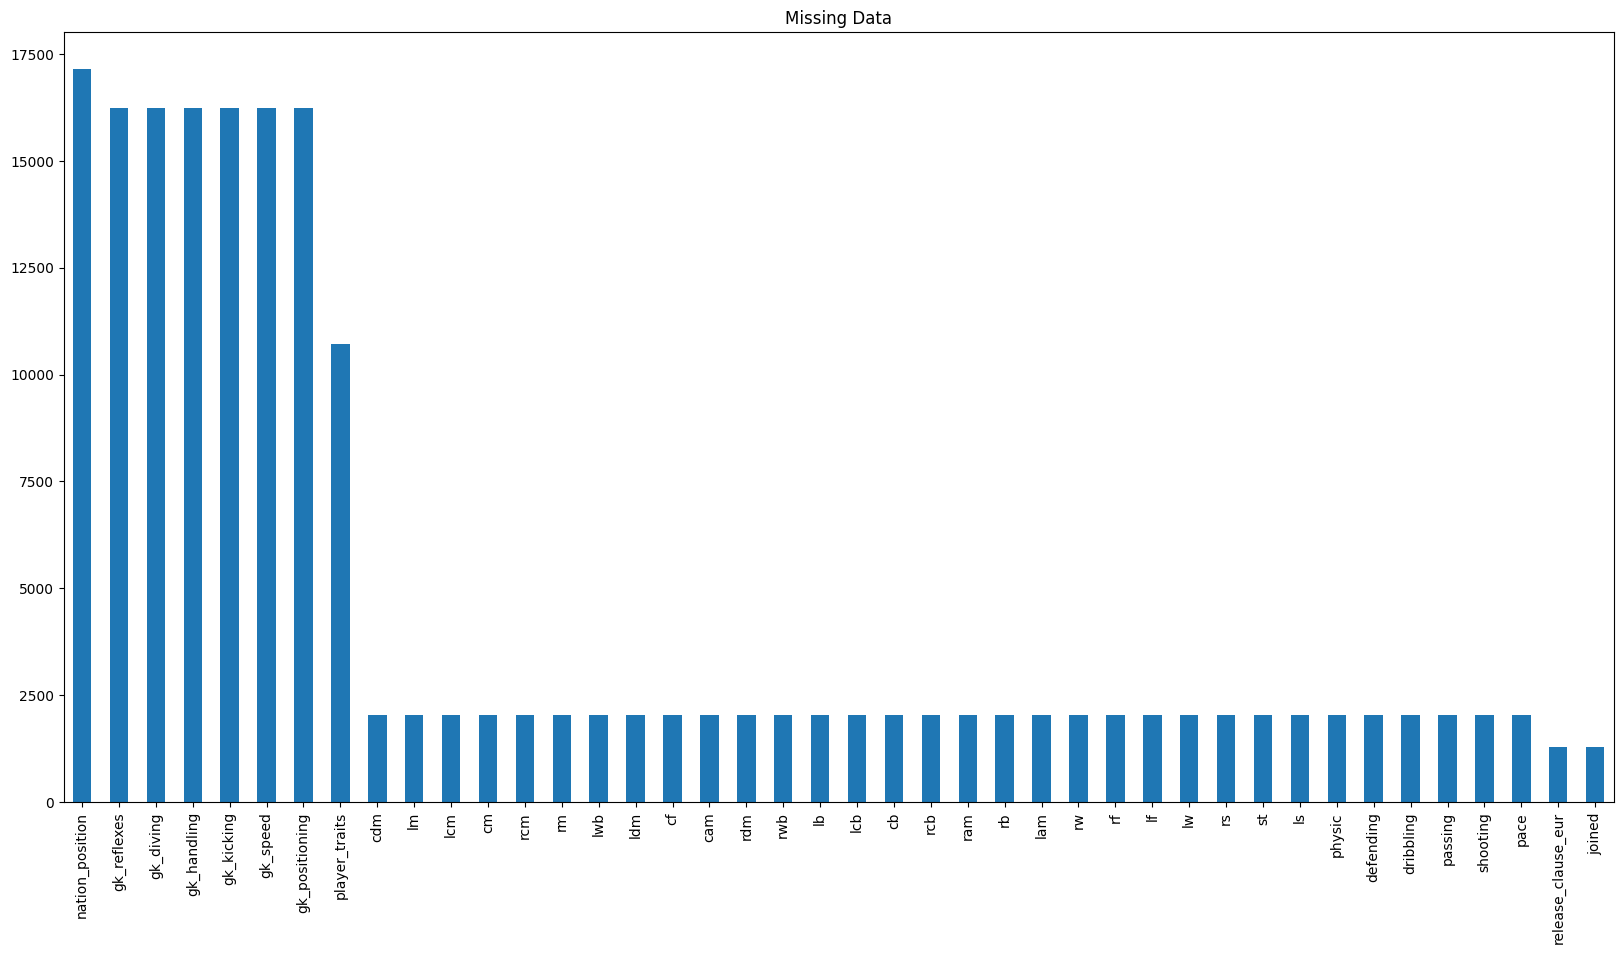

In [12]:
plt.figure(figsize=(20,10))
missing = data.isnull().sum()
missing = missing[missing > 0]
missing = missing.sort_values(ascending = False)
missing.plot.bar()
plt.title('Missing Data');

 We can see that some of the features got more than 50% missing data which is not good for training the model.


# EDA

## Prefered foot of players


Left Preferred 4318
Right Preferred 13960


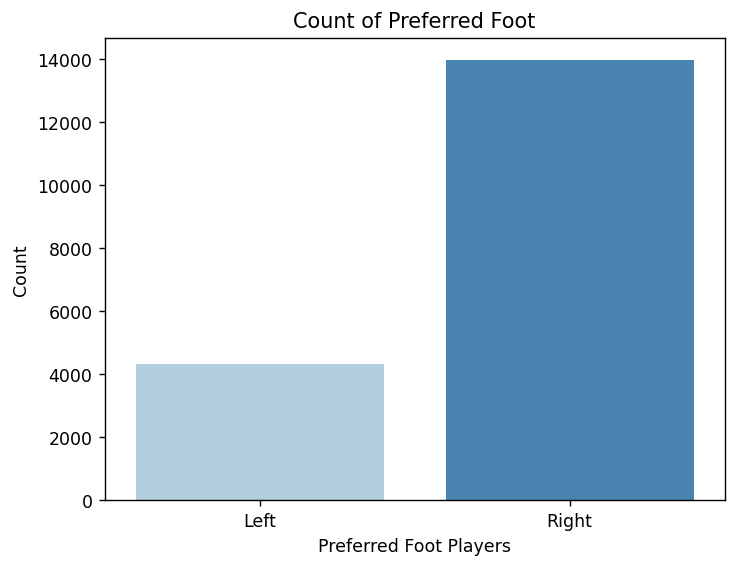

In [13]:
plt.figure(dpi=125)
sns.countplot(x = 'preferred_foot',data=data,palette='Blues')
plt.xlabel('Preferred Foot Players')
plt.ylabel('Count')
plt.title('Count of Preferred Foot')
Right,Left = data.preferred_foot.value_counts()
print('Left Preferred',Left)
print('Right Preferred',Right)
plt.show()

Most of the players prefer right foot while playing.


### International Reputation of players

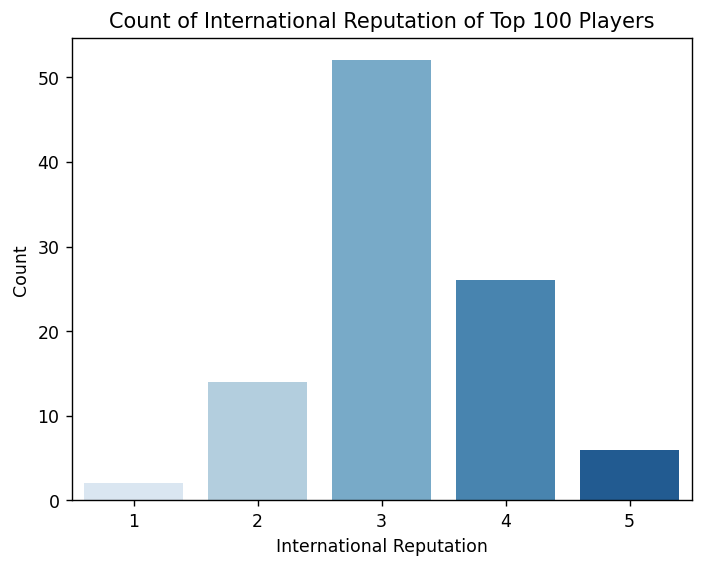

In [14]:
plt.figure(dpi=125)
sns.countplot(x = 'international_reputation',data=data.head(100),palette='Blues')
plt.xlabel('International Reputation')
plt.ylabel('Count')
plt.title('Count of International Reputation of Top 100 Players')
plt.show()

### Age of players


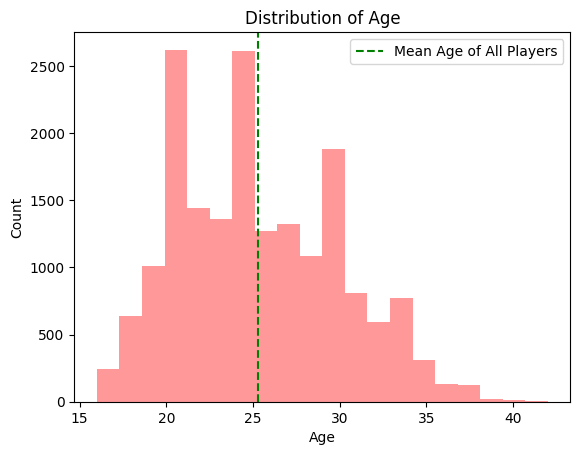

In [15]:
sns.distplot(a=data['age'],kde=False,bins=20,color='red')
plt.axvline(x=np.mean(data['age']),c='green',ls='--',label='Mean Age of All Players')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.show()

### Overall rating of a players


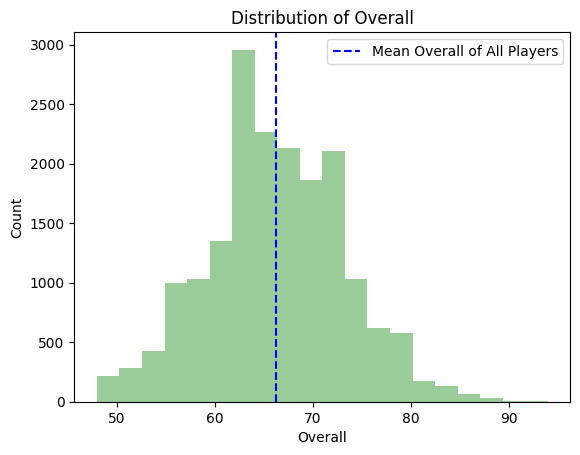

In [16]:
sns.distplot(a=data['overall'],kde=False,bins=20,color='green')
plt.axvline(x=np.mean(data['overall']),c='blue',ls='--',label='Mean Overall of All Players')
plt.legend()
plt.xlabel('Overall')
plt.ylabel('Count')
plt.title('Distribution of Overall')
plt.show()

### Relation between overall rating and value in euros


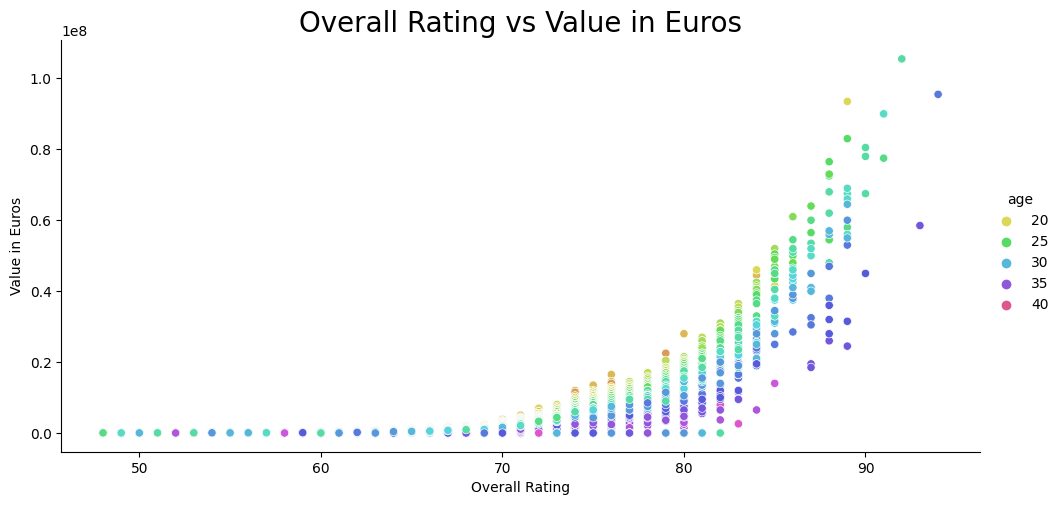

In [17]:
sns.relplot(x='overall',y='value_eur',hue='age',palette='hls',data=data,aspect=2)
plt.title('Overall Rating vs Value in Euros',fontsize = 20)
plt.xlabel('Overall Rating')
plt.ylabel('Value in Euros')
plt.show()

Thus, we can see value in euro increases as overall rating increases and players of lesser age with higher overall rating have higher value in euros.


### Realtional between potential rating and wage in euros


In [18]:
data.age.unique()

array([32, 34, 27, 26, 28, 33, 20, 25, 31, 30, 24, 29, 23, 19, 22, 37, 36,
       21, 41, 38, 35, 18, 40, 39, 17, 16, 42], dtype=int64)

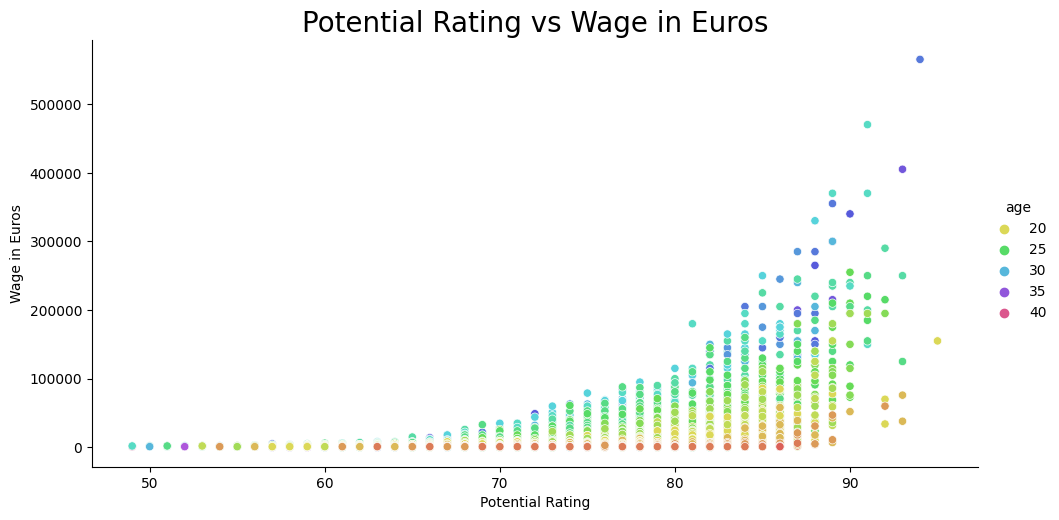

In [19]:
sns.relplot(x='potential',y='wage_eur',hue='age',palette='hls',data=data,aspect=2)
plt.title('Potential Rating vs Wage in Euros',fontsize = 20)
plt.xlabel('Potential Rating')
plt.ylabel('Wage in Euros')
plt.show()

Wage of the player increases as they get older having higher potential rating.

### Nationality of the player


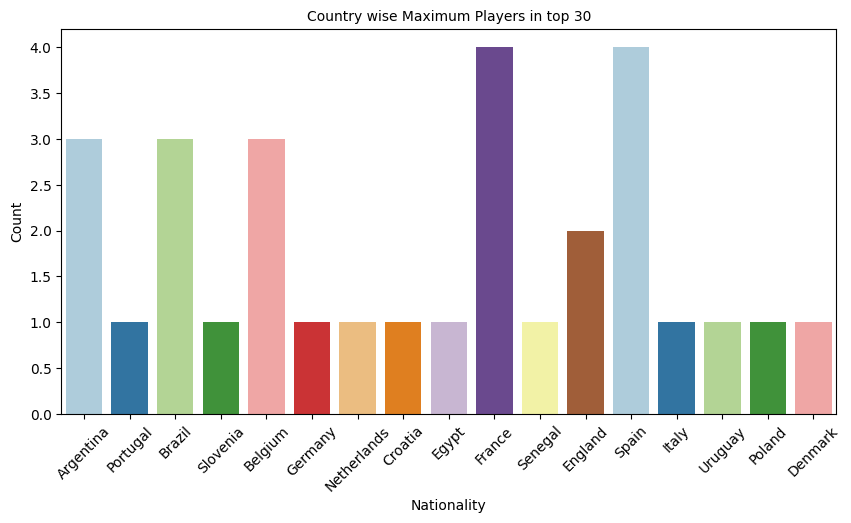

In [20]:
plt.figure(figsize=(10,5),dpi=100)
sns.countplot(x='nationality',data=data.head(30),palette='Paired')
plt.xlabel('Nationality')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Country wise Maximum Players in top 30',fontsize=10)
plt.show()

### Club of players

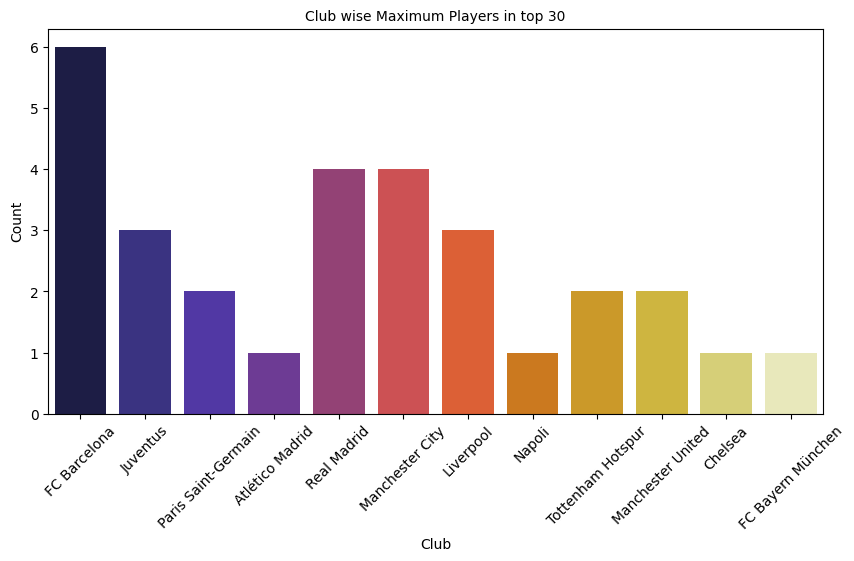

In [21]:
plt.figure(figsize=(10,5),dpi=100)
sns.countplot(x='club',data=data.head(30),palette='CMRmap')
plt.xlabel('Club')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.title('Club wise Maximum Players in top 30',fontsize=10)
plt.show()

### Relation between Movement balance and pace


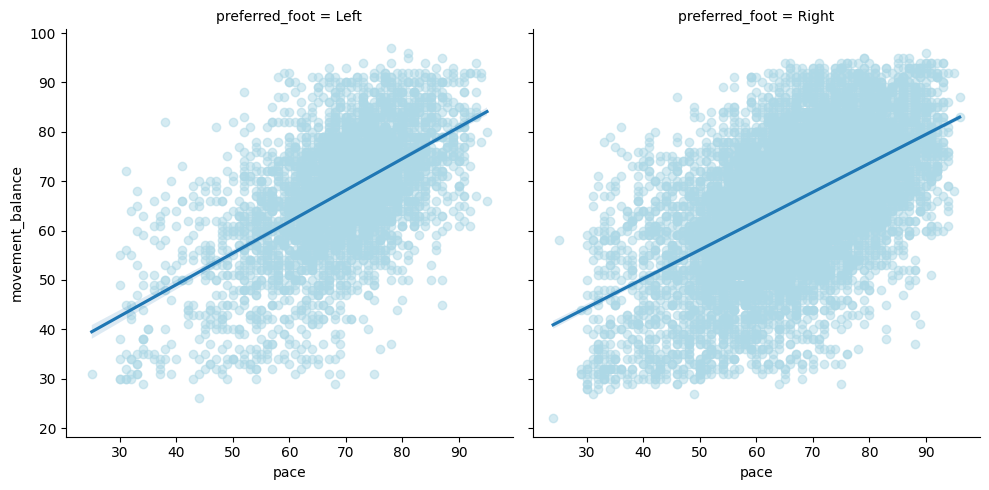

In [22]:
sns.lmplot(x='pace',y='movement_balance',data=data,col='preferred_foot',scatter_kws={'alpha':0.5,'color':'lightblue'})

### Relation between finishing ability and shooting


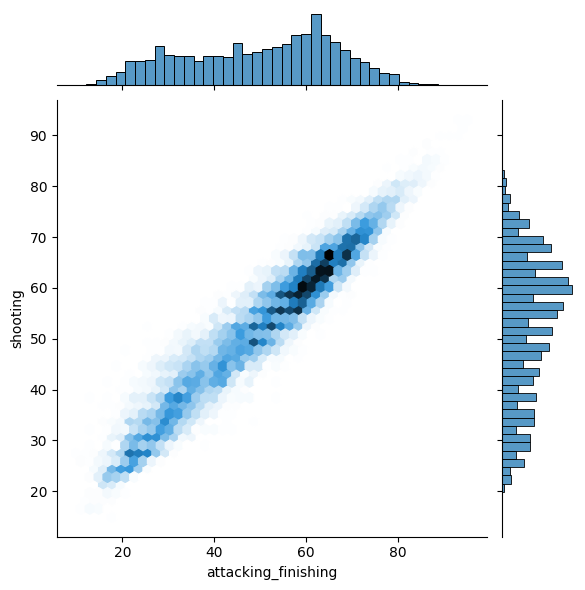

In [23]:
sns.jointplot(x='attacking_finishing',y='shooting',data=data,kind='hex')

### Plotting top 10 countries with highest mean wage


Text(0.5, 1.0, 'Top 10 Country with highest mean wage')

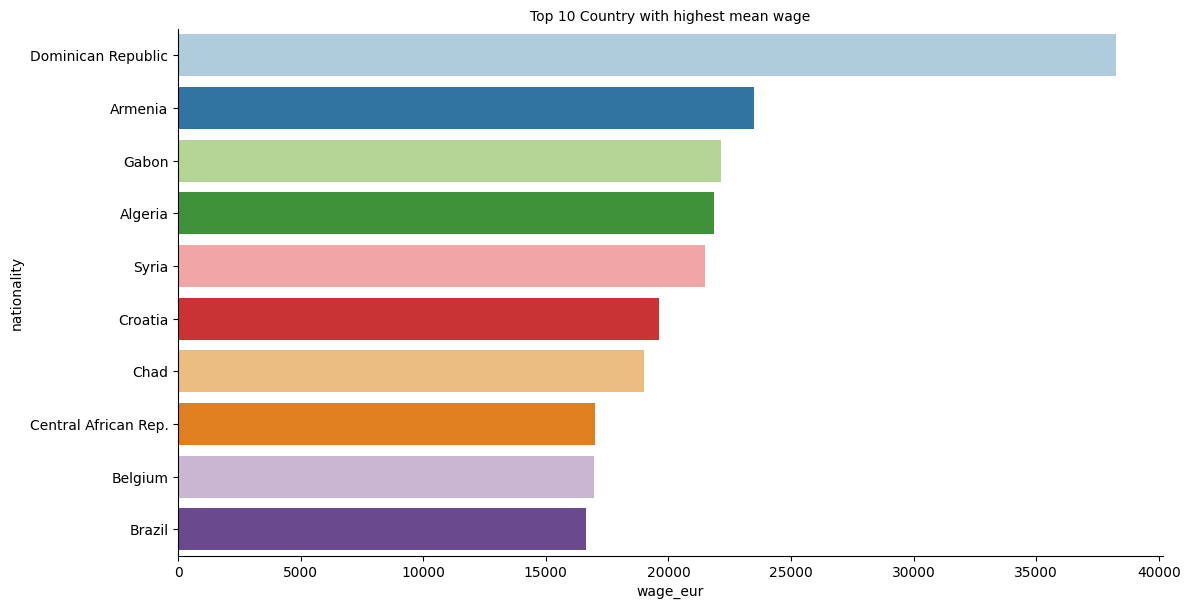

In [24]:
avg_wage_overall = data.groupby('nationality',as_index=False)['wage_eur','overall'].mean()
avg_wage_overall.sort_values(by='wage_eur',inplace=True,ascending=False)
top_10_by_wage = avg_wage_overall.iloc[0:10,:]
sns.catplot(x='wage_eur',y='nationality',data=top_10_by_wage,palette='Paired',height=6,kind='bar',aspect=2)
plt.title('Top 10 Country with highest mean wage',fontsize=10)

### Finding the relation between Height and Weight of the player


<AxesSubplot: xlabel='height_cm', ylabel='weight_kg'>

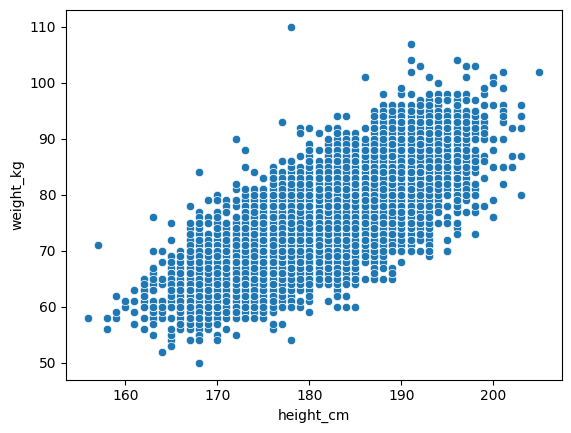

In [25]:
sns.scatterplot(x = 'height_cm', y = 'weight_kg', data = data)

The relationship of Height and Weight of a player is linear


### Replacing Height and Weight by BMI using formula


In [26]:
bmi = data['weight_kg']/((data['height_cm']/100)**2)
bmi = bmi.map('{:,.2f}'.format)
data.insert(2,'BMI',value=bmi)
data = data.drop(columns = ['weight_kg', 'height_cm'])
data.head()

long_name  age    BMI nationality  \
0       Lionel Andrés Messi Cuccittini   32  24.91   Argentina   
1  Cristiano Ronaldo dos Santos Aveiro   34  23.74    Portugal   
2        Neymar da Silva Santos Junior   27  22.20      Brazil   
3                            Jan Oblak   26  24.62    Slovenia   
4                          Eden Hazard   28  24.16     Belgium   

                  club  overall  potential  value_eur  wage_eur  \
0         FC Barcelona       94         94   95500000    565000   
1             Juventus       93         93   58500000    405000   
2  Paris Saint-Germain       92         92  105500000    290000   
3      Atlético Madrid       91         93   77500000    125000   
4          Real Madrid       91         91   90000000    470000   

  player_positions preferred_foot  international_reputation  weak_foot  \
0       RW, CF, ST           Left                         5          4   
1           ST, LW          Right                         5          4   
2          LW, CAM          Right                         5          5   
3               GK          Right                         3          3   
4           LW, CF          Right                         4          4   

   skill_moves      work_rate   body_type real_face  release_clause_eur  \
0            4     Medium/Low       Messi       Yes         195800000.0   
1            5       High/Low  C. Ronaldo       Yes          96500000.0   
2            5    High/Medium      Neymar       Yes         195200000.0   
3            1  Medium/Medium      Normal       Yes         164700000.0   
4            4    High/Medium      Normal       Yes         184500000.0   

       joined nation_position  pace  shooting  passing  dribbling  defending  \
0  2004-07-01             NaN  87.0      92.0     92.0       96.0       39.0   
1  2018-07-10              LS  90.0      93.0     82.0       89.0       35.0   
2  2017-08-03              LW  91.0      85.0     87.0       95.0       32.0   
3  2014-07-16              GK   NaN       NaN      NaN        NaN        NaN   
4  2019-07-01              LF  91.0      83.0     86.0       94.0       35.0   

   physic  gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  \
0    66.0        NaN          NaN         NaN          NaN       NaN   
1    78.0        NaN          NaN         NaN          NaN       NaN   
2    58.0        NaN          NaN         NaN          NaN       NaN   
3     NaN       87.0         92.0        78.0         89.0      52.0   
4    66.0        NaN          NaN         NaN          NaN       NaN   

   gk_positioning                                      player_traits  \
0             NaN  Beat Offside Trap, Argues with Officials, Earl...   
1             NaN  Long Throw-in, Selfish, Argues with Officials,...   
2             NaN  Power Free-Kick, Injury Free, Selfish, Early C...   
3            90.0                         Flair, Acrobatic Clearance   
4             NaN  Beat Offside Trap, Selfish, Finesse Shot, Spee...   

   attacking_crossing  attacking_finishing  attacking_heading_accuracy  \
0                  88                   95                          70   
1                  84                   94                          89   
2                  87                   87                          62   
3                  13                   11                          15   
4                  81                   84                          61   

   attacking_short_passing  attacking_volleys  skill_dribbling  skill_curve  \
0                       92                 88               97           93   
1                       83                 87               89           81   
2                       87                 87               96           88   
3                       43                 13               12           13   
4                       89                 83               95           83   

   skill_fk_accuracy  skill_long_passing  skill_ball_control  \
0 

In [27]:
data['BMI'] = data['BMI'].astype(float)


### Finding the relation between value_eur and wage_eur of the player


0.8580515349397337

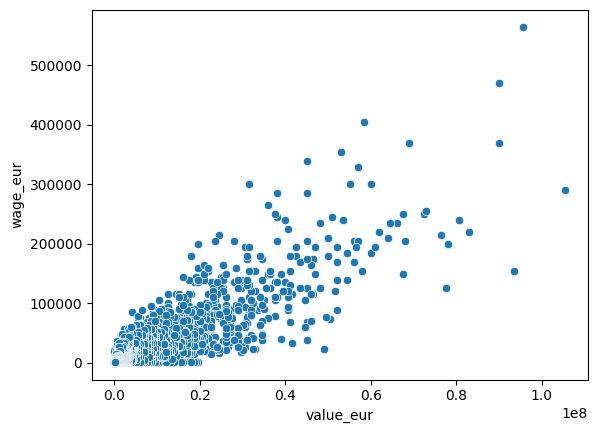

In [28]:
sns.scatterplot(x = 'value_eur', y = 'wage_eur', data = data)
data['value_eur'].corr(data['wage_eur'])

### Finding the relation between Overall and Potential of the player

0.6466500272615209

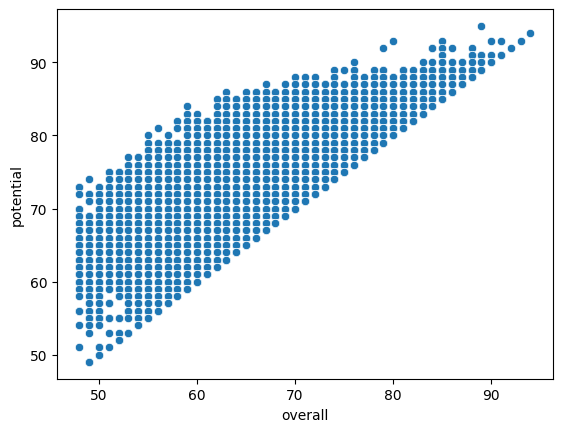

In [29]:
sns.scatterplot(x = 'overall', y = 'potential', data = data)
data['overall'].corr(data['potential'])

### Pie plot for preferred_foot feature

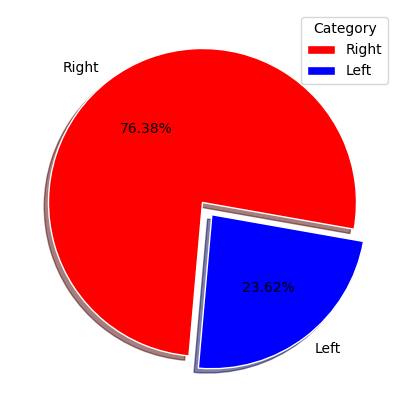

In [30]:
plt.figure(figsize=(5,5))
plt.pie(data['preferred_foot'].value_counts(),labels=['Right','Left'],colors=['red', 'blue'],
explode=[0,0.1],autopct='%.2f%%', shadow = True,startangle = -10,wedgeprops= {'edgecolor':'white','linewidth':1})
plt.legend(labels=['Right','Left'],loc="upper right",title='Category')
plt.show()

### combining player positions to get less columns (splitting player_position column)


In [31]:
def combine_positions(row):
    # There are 15 different positions
    positions = row['player_positions'].split(', ') 
    N = len(positions)
    if N < 3:
        # If a player has two positions the first one will be considered as their
        # position, of course, players with only one position won't be affected
        position = positions[0]
        if position in ['ST', 'LW', 'RW','CF']: #4
            return 0 #ATTACKER
        elif position in ['CAM', 'LM', 'CM', 'RM', 'CDM']: #5
            return 1 #MIDFIELDER
        elif position in ['LWB', 'RWB', 'LB', 'CB', 'RB']: #5
            return 2 #DEFENDER
        elif position in ['GK']: #1
            return 3 #GOALKEEPER
    else: # If player has three possible positions
        position_count = [0, 0, 0, 0] 
        for position in positions:
            if position in ['ST', 'LW', 'RW','CF']: #4
                index = 0 #ATTACKER
            elif position in ['CAM', 'LM', 'CM', 'RM', 'CDM']: #5
                index = 1 #MIDFIELDER
            elif position in ['LWB', 'RWB', 'LB', 'CB', 'RB']: #5
                index = 2 #DEFENDER
            elif position in ['GK']: #1
                index = 3 #GOALKEEPER
            else:
                continue
            position_count[index] += 1
 # This will count which was the most repeated position and assign it
 # to the player
        return position_count.index(max(position_count))
    
data['player_positions'] = data.apply(combine_positions, axis=1)


### Splitting Work Rate using dummies with ' \ ' seperation


In [32]:
new_work_rate = data['work_rate'].str.get_dummies(sep = '/').add_prefix('work_rate_')
data = pd.concat([data, new_work_rate], axis = 1)
data = data.drop(columns = ['work_rate'])

In [33]:
# Changing positions of players as there is + assigned with some digit

position_columns = data.loc[:, 'ls':'rb']

In [34]:
for column in position_columns:
 data[column] = data[column].str.split('+').str[0]

In [35]:
# Applying ZERO to null values, has the missing records in fielders position columns are of GoalKeeper

data.loc[:, 'ls':'rb'] = data.loc[:, 'ls':'rb'].fillna(0)

In [36]:
# Changing the data type of position columns from Object to Int

data.loc[:, 'ls':'rb'] = data.loc[:, 'ls':'rb'].astype(int)

### Filling null values


In [37]:
data.loc[:,'pace':'gk_positioning'] = data.loc[:,'pace':'gk_positioning'].fillna(0)
data.head()

long_name  age    BMI nationality  \
0       Lionel Andrés Messi Cuccittini   32  24.91   Argentina   
1  Cristiano Ronaldo dos Santos Aveiro   34  23.74    Portugal   
2        Neymar da Silva Santos Junior   27  22.20      Brazil   
3                            Jan Oblak   26  24.62    Slovenia   
4                          Eden Hazard   28  24.16     Belgium   

                  club  overall  potential  value_eur  wage_eur  \
0         FC Barcelona       94         94   95500000    565000   
1             Juventus       93         93   58500000    405000   
2  Paris Saint-Germain       92         92  105500000    290000   
3      Atlético Madrid       91         93   77500000    125000   
4          Real Madrid       91         91   90000000    470000   

   player_positions preferred_foot  international_reputation  weak_foot  \
0                 0           Left                         5          4   
1                 0          Right                         5          4   
2                 0          Right                         5          5   
3                 3          Right                         3          3   
4                 0          Right                         4          4   

   skill_moves   body_type real_face  release_clause_eur      joined  \
0            4       Messi       Yes         195800000.0  2004-07-01   
1            5  C. Ronaldo       Yes          96500000.0  2018-07-10   
2            5      Neymar       Yes         195200000.0  2017-08-03   
3            1      Normal       Yes         164700000.0  2014-07-16   
4            4      Normal       Yes         184500000.0  2019-07-01   

  nation_position  pace  shooting  passing  dribbling  defending  physic  \
0             NaN  87.0      92.0     92.0       96.0       39.0    66.0   
1              LS  90.0      93.0     82.0       89.0       35.0    78.0   
2              LW  91.0      85.0     87.0       95.0       32.0    58.0   
3              GK   0.0       0.0      0.0        0.0        0.0     0.0   
4              LF  91.0      83.0     86.0       94.0       35.0    66.0   

   gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
0        0.0          0.0         0.0          0.0       0.0             0.0   
1        0.0          0.0         0.0          0.0       0.0             0.0   
2        0.0          0.0         0.0          0.0       0.0             0.0   
3       87.0         92.0        78.0         89.0      52.0            90.0   
4        0.0          0.0         0.0          0.0       0.0             0.0   

                                       player_traits  attacking_crossing  \
0  Beat Offside Trap, Argues with Officials, Earl...                  88   
1  Long Throw-in, Selfish, Argues with Officials,...                  84   
2  Power Free-Kick, Injury Free, Selfish, Early C...                  87   
3                         Flair, Acrobatic Clearance                  13   
4  Beat Offside Trap, Selfish, Finesse Shot, Spee...                  81   

   attacking_finishing  attacking_heading_accuracy  attacking_short_passing  \
0                   95                          70                       92   
1                   94                          89                       83   
2                   87                          62                       87   
3                   11                          15                       43   
4                   84                          61                       89   

   attacking_volleys  skill_dribbling  skill_curve  skill_fk_accuracy  \
0                 88               97           93                 94   
1                 87               89           81                 76   
2                 87               96           88                 87   
3                 13               12           13                 14   
4                 83               95           83                 79   

   skill_long_passing  skill_ball_co

In [38]:
# Number of numerical columns

num_col = list(data.select_dtypes(exclude='object').columns)
len(num_col)

86

In [39]:
# Number of Categorical columns

cat_col = list(data.select_dtypes(include='object').columns)
len(cat_col)

9

## Categorical Encoding


In [40]:
label_encoder = LabelEncoder()
for columns in cat_col:
 data[columns] = label_encoder.fit_transform(data[columns])

<AxesSubplot: xlabel='release_clause_eur', ylabel='Density'>

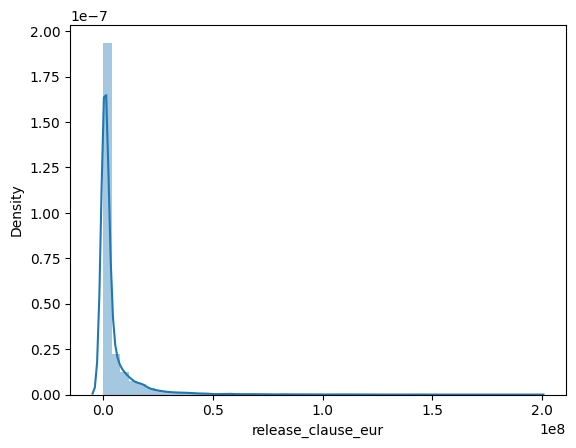

In [41]:
# Checking the distribution of release_clause_eur to fill null values

sns.distplot(data['release_clause_eur'])

In [42]:
data['release_clause_eur'] = data['release_clause_eur'].fillna(data['release_clause_eur'].median())

### Feature selection


##### Heatmap to check the correlation of features


<AxesSubplot: >

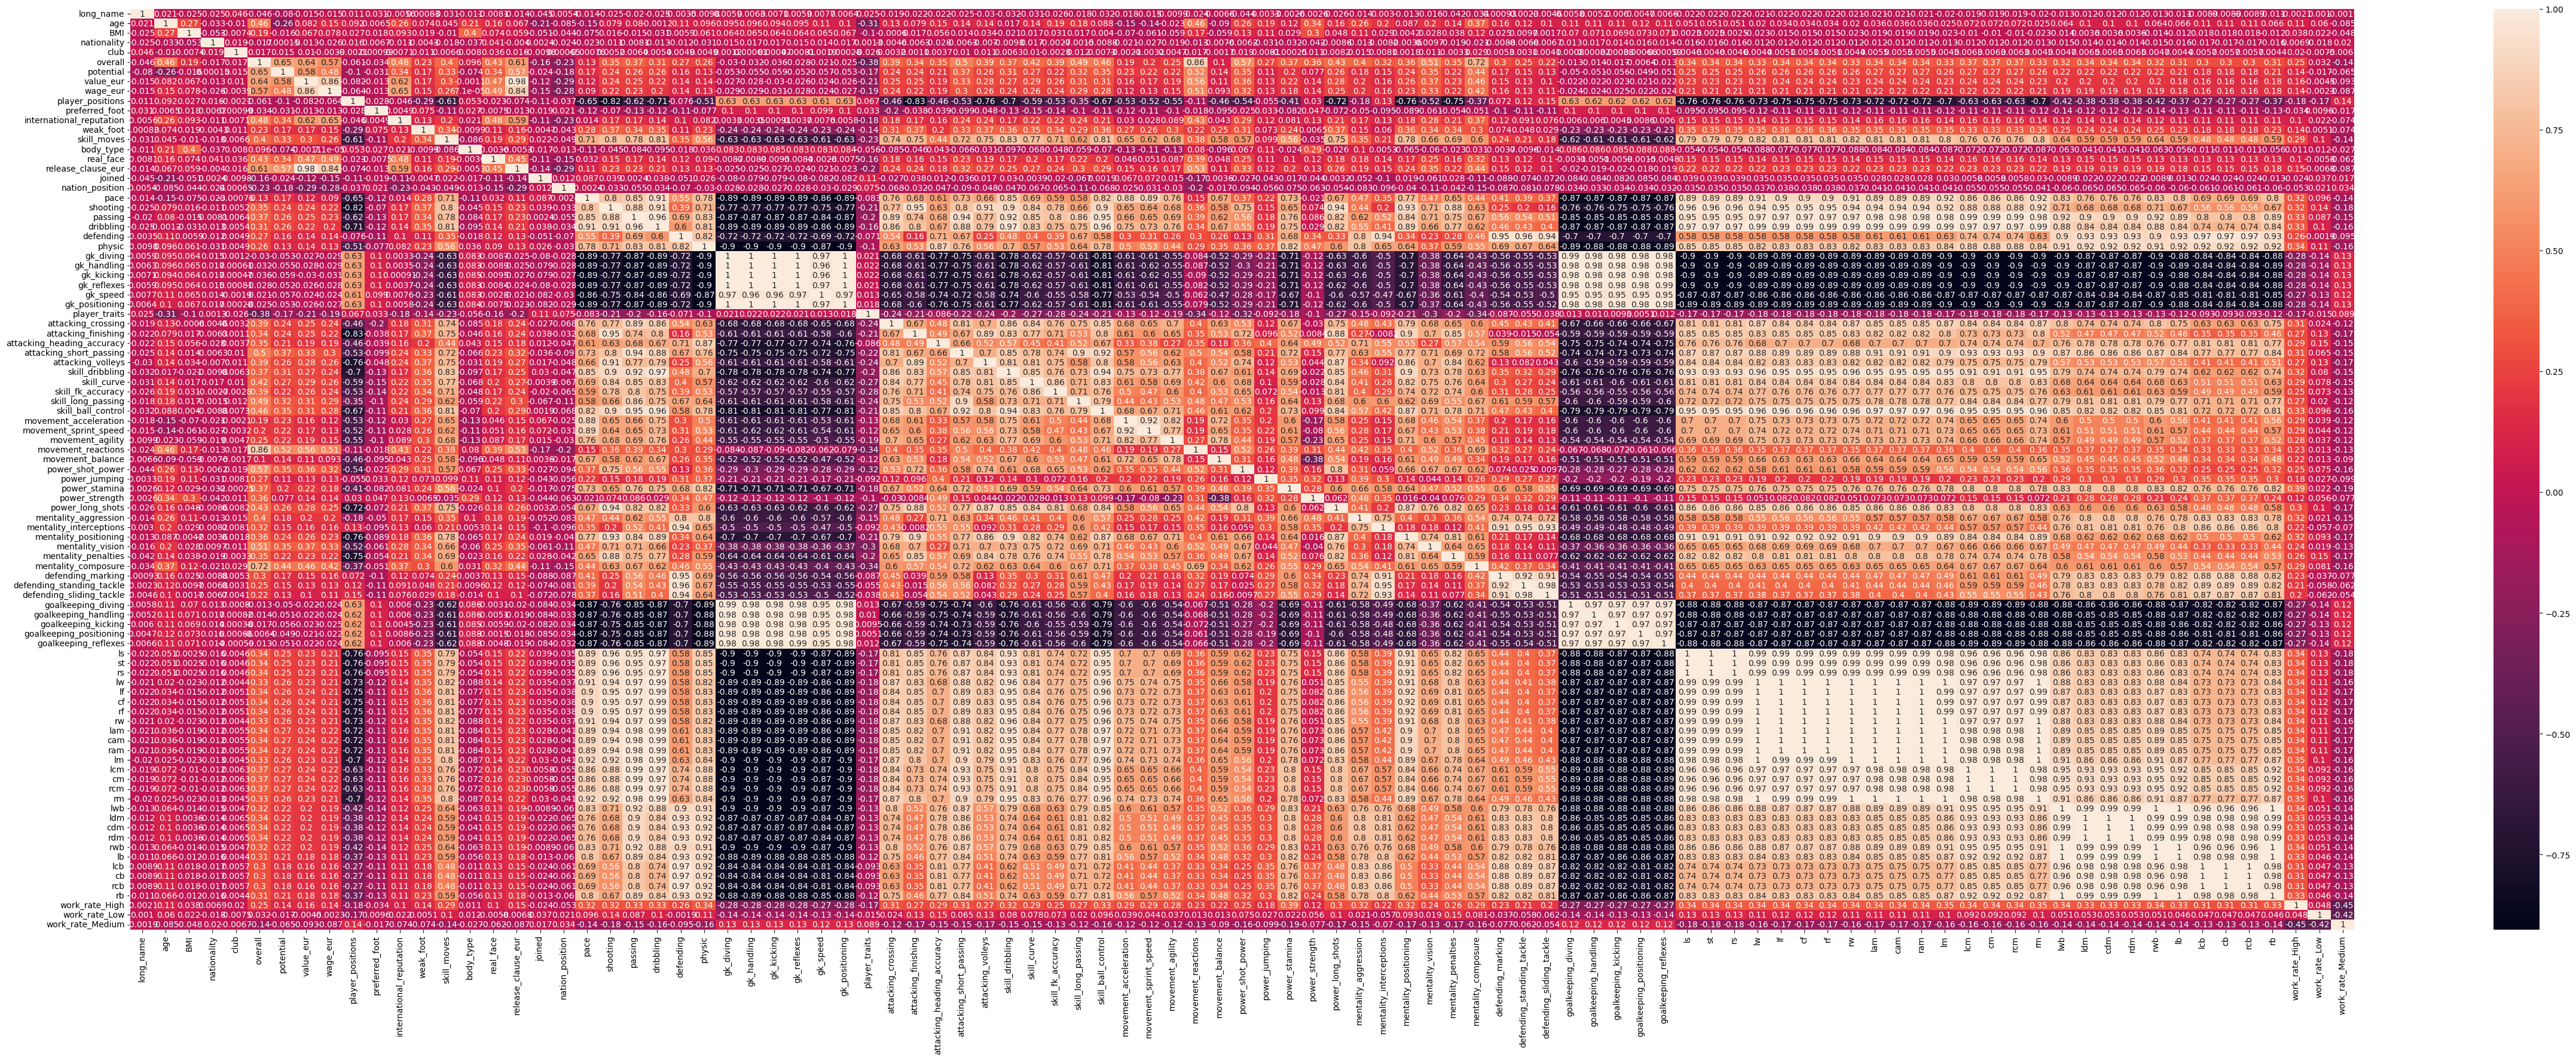

In [43]:
plt.figure(figsize=(60,20))
sns.heatmap(data.corr(),annot=True)

# Modelling


In [44]:
X= data.copy()
X.head()

long_name  age    BMI  nationality  club  overall  potential  value_eur  \
0       9790   32  24.91            5   224       94         94   95500000   
1       3180   34  23.74          121   350       93         93   58500000   
2      12430   27  22.20           18   462       92         92  105500000   
3       7316   26  24.62          133    63       91         93   77500000   
4       4367   28  24.16           12   505       91         91   90000000   

   wage_eur  player_positions  preferred_foot  international_reputation  \
0    565000                 0               0                         5   
1    405000                 0               1                         5   
2    290000                 0               1                         5   
3    125000                 3               1                         3   
4    470000                 0               1                         4   

   weak_foot  skill_moves  body_type  real_face  release_clause_eur  joined  \
0          4            4          4          1         195800000.0      11   
1          4            5          1          1          96500000.0    1399   
2          5            5          5          1         195200000.0    1119   
3          3            1          6          1         164700000.0     402   
4          4            4          6          1         184500000.0    1711   

   nation_position  pace  shooting  passing  dribbling  defending  physic  \
0               26  87.0      92.0     92.0       96.0       39.0    66.0   
1               12  90.0      93.0     82.0       89.0       35.0    78.0   
2               13  91.0      85.0     87.0       95.0       32.0    58.0   
3                5   0.0       0.0      0.0        0.0        0.0     0.0   
4               10  91.0      83.0     86.0       94.0       35.0    66.0   

   gk_diving  gk_handling  gk_kicking  gk_reflexes  gk_speed  gk_positioning  \
0        0.0          0.0         0.0          0.0       0.0             0.0   
1        0.0          0.0         0.0          0.0       0.0             0.0   
2        0.0          0.0         0.0          0.0       0.0             0.0   
3       87.0         92.0        78.0         89.0      52.0            90.0   
4        0.0          0.0         0.0          0.0       0.0             0.0   

   player_traits  attacking_crossing  attacking_finishing  \
0            110                  88                   95   
1            685                  84                   94   
2            785                  87                   87   
3            332                  13                   11   
4            163                  81                   84   

   attacking_heading_accuracy  attacking_short_passing  attacking_volleys  \
0                          70                       92                 88   
1                          89                       83                 87   
2                          62                       87                 87   
3                          15                       43                 13   
4                          61                       89                 83   

   skill_dribbling  skill_curve  skill_fk_accuracy  skill_long_passing  \
0               97           93                 94                  92   
1               89           81                 76                  77   
2               96           88                 87                  81   
3               12           13                 14                  40   
4               95           83                 79                  83   

   skill_ball_control  movement_acceleration  movement_sprint_speed  \
0                  96                     91                     84   
1                  92                     89                     91   
2                  95                     94                     89   
3                  30                     43                     60   
4                  94             

### Scaling the features


In [45]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## K-Means Algorithm


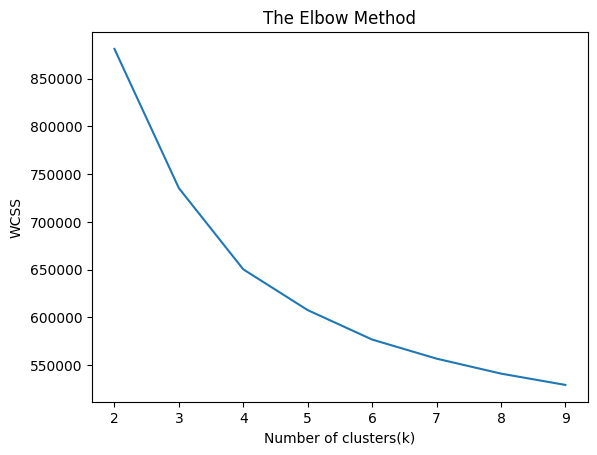

[881086.6010577241, 735379.7110176695, 650367.7043409273, 607692.2517510185, 576878.0800208361, 556905.7254190276, 541230.1903100885, 529378.4407554291]


In [46]:
wcss=[]
for i in range (2,10):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters(k)')
plt.ylabel('WCSS')
plt.show()
print(wcss)


In [47]:
model = KMeans(n_clusters=2, random_state=300)
model.fit(X_scaled)


KMeans(n_clusters=2, random_state=300)

In [48]:
label=model.labels_
score=silhouette_score(X_scaled,label)
score

0.5950129015203759

# PCA Algorithm


### Creating new dataframe


In [49]:
df=pd.DataFrame(data=X_scaled, columns= X.columns)

#### Getting the optimal number of pca


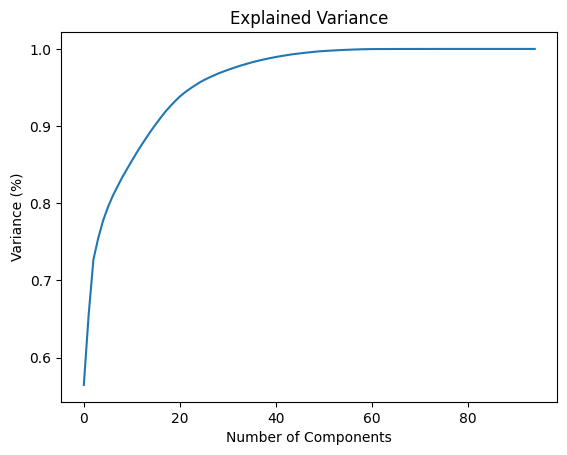

In [50]:
pca = PCA()
principalComponents = pca.fit_transform(df)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') 
plt.title('Explained Variance')
plt.show()

From the diagram above, it can be seen that 20 principal components explain more than 90% of the variance in data and 60 principal components
explain around 100% of the variance in data.

So, instead of giving all the columns as input, we’d only feed these 20 principal components of the data to the machine learning algorithm.

In [51]:
pca = PCA(n_components=20)
new_data = pca.fit_transform(df)
pca_df_20 = pd.DataFrame(data = new_data, columns = ['pc1','pc2','pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10','pc11','pc12','pc13','pc14','pc15','pc16','pc17','pc18','pc19','pc20'])

In [52]:
pca_df_20.head()

pc1        pc2        pc3        pc4        pc5       pc6       pc7  \
0 -13.919950  14.204279  21.712055   9.544720  17.045292  2.064503 -0.259730   
1 -12.584120  11.733999  16.118790   4.434388  13.316721 -0.871981  1.855975   
2 -12.467825  13.721986  18.021547  10.083765  15.274286  1.477267 -0.987343   
3  17.606561   7.624922  19.341306   7.321371   9.629977 -1.617623 -2.051345   
4 -12.468876  13.080369  18.982945   9.560299  16.042666  0.899096 -1.836614   

         pc8       pc9      pc10      pc11      pc12      pc13      pc14  \
0  11.628362  1.395966 -2.457306 -0.176318 -0.814720 -3.622507 -0.313579   
1   5.182205  0.389886 -0.430269  2.956670 -0.949423  1.109682  3.460850   
2   8.003354 -0.075208 -0.199142  0.469598  2.102604  0.875554  2.194292   
3   3.446892  1.036808  0.024658  2.849373  0.803333  2.446560  1.021023   
4   8.574185  1.930676  0.242994  1.036153  2.141150  0.768067  3.534601   

       pc15      pc16      pc17      pc18       pc19      pc20  
0 -0.599635 -2.719957  2.269975 -2.022369  11.528994  1.355813  
1  0.169439 -1.208071 -0.828709  0.122700   5.224960  1.520277  
2 -2.396472 -0.880134  0.733895 -0.546740   8.852847  0.944065  
3 -0.302233  3.614022  1.532142 -1.064490   3.835853  0.094422  
4 -2.987791 -0.583444  0.978630 -3.045803   9.132118  1.303050

### Modeling to PCA


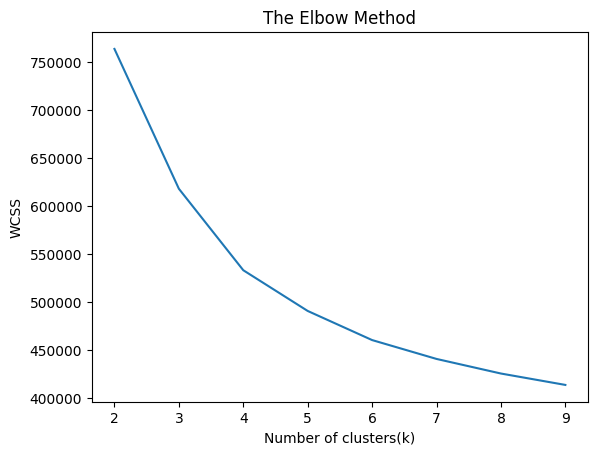

In [53]:
wcss=[]
for i in range (2,10):
    kmeans=KMeans(n_clusters=i,random_state=42)
    kmeans.fit(pca_df_20)
    wcss.append(kmeans.inertia_)
plt.plot(range(2,10),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters(k)')
plt.ylabel('WCSS')
plt.show()

In [54]:
model = KMeans(n_clusters=2, random_state=4)
model.fit(pca_df_20)

KMeans(n_clusters=2, random_state=4)

In [55]:
label=model.labels_
score=silhouette_score(pca_df_20,label)
score

0.6227554491084845

### Conclusion

The given dataset was a Un-Supervised dataset of Fifa-20, and the data was imported to Jupiter notebook using Pandas library. We had gone
through the features of the dataset. Now the dataset is ready to fed into the clustering algorithm and this was achieved by replacing null values and
removing duplicate data and converting categorical features along with feature engineering.
Algorithms and Tuning Parameters used to determine the Fifa 20 dataset:
1. K-Means Clustering
2. Principal Component Analysis (PCA)

Compared to both the models K-Means Clustering using Principal Component Analysis has given the best silhouette score.